## CV19 Vaccine Progress 

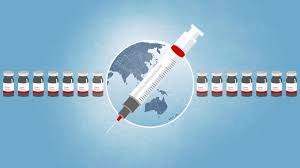

"I'd much rather have a vaccine than this virus' - Paul A Voldenburg MD <br>
"We were standing on one side of a massive river of uncertainty and hardship... we’re now seeing the other side of the river” Christine LaGarde, President ECB

<b>Purpose:</b> To explore the CV19 Vaccination dataset with the below ideas<br>
* Split into segments and view vaccincation progress
* View mapping of world charts as above and what countries are using what vaccines
* Time to threshold (e.g. 50%, 75%) vaccincated population, based on forecast, assuming same trends continue.



### 1. Import Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/gap-minder-gdpgrowth/gapminder_tidy.csv


In [2]:
#Import CV19 vaccination dataset
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv',engine='python')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [3]:
#Import economic dataset
gm = pd.read_csv('/kaggle/input/gap-minder-gdpgrowth/gapminder_tidy.csv',engine='python')
gm.head()

,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,1168.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,1173.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,1187.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,1178.0,South Asia


In [4]:
#how many countries are present in the dataset
df['country'].nunique()

156

In [5]:
#Number of countries
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Faeroe Islands', 'Falkland Islands', 'Finland', 'France',
       'Gambia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jersey', 'Jordan', 'Kazakhstan', 'Ken

In [6]:
#get most recent year available from gapminder data 
gm_max_year = gm.groupby(['Country'])['Year'].max().reset_index()

In [7]:
gm_max_year

,Country,Year
0,Afghanistan,2013
1,Albania,2013
2,Algeria,2013
3,Angola,2013
4,Antigua and Barbuda,2013
...,...,...
199,Western Sahara,2013
200,"Yemen, Rep.",2013
201,Zambia,2013
202,Zimbabwe,2013


In [8]:
#Join back to iteself to get the latest year available in economic data
gm_max = gm.merge(gm_max_year,how='inner',on=['Country','Year'])

In [9]:
#Join to main dataset
df_gm = df.merge(gm_max,how='left',left_on='country',right_on='Country')

In [10]:
df_gm.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,source_website,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,http://www.xinhuanet.com/english/asiapacific/2...,Afghanistan,2013.0,4.9,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,http://www.xinhuanet.com/english/asiapacific/2...,Afghanistan,2013.0,4.9,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,http://www.xinhuanet.com/english/asiapacific/2...,Afghanistan,2013.0,4.9,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,http://www.xinhuanet.com/english/asiapacific/2...,Afghanistan,2013.0,4.9,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,http://www.xinhuanet.com/english/asiapacific/2...,Afghanistan,2013.0,4.9,60.947,34499915.0,96.7,1884.0,3023.0,South Asia


In [11]:
#GDP per capita
df_gm['gdp_per_capita'] = df_gm['gdp'] / df_gm['population']

In [12]:
df_gm.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3443
people_vaccinated                      4006
people_fully_vaccinated                5549
daily_vaccinations_raw                 4303
daily_vaccinations                      173
total_vaccinations_per_hundred         3443
people_vaccinated_per_hundred          4006
people_fully_vaccinated_per_hundred    5549
daily_vaccinations_per_million          173
vaccines                                  0
source_name                               0
source_website                            0
Country                                1888
Year                                   1888
fertility                              1888
life                                   1888
population                             1888
child_mortality                        1982
gdp                                    1940
gdp-1                           

In [13]:
df_gm['region'] = df_gm['region'].fillna('Other')
df_gm['population'] = df_gm['population'].fillna(df_gm['population'].mean())
df_gm['life'] = df_gm['life'].fillna(df_gm['life'].mean())
df_gm['gdp'] = df_gm['gdp'].fillna(df_gm['gdp'].mean())

In [14]:
#Some data quality issues with null data
df_gm[df_gm['country']=='China'].tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region,gdp_per_capita
1707,China,CHN,2021-03-25,91346000.0,NaN,NaN,5486300.0,2816476.0,6.35,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1708,China,CHN,2021-03-26,97470000.0,NaN,NaN,6124000.0,3453810.0,6.77,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1709,China,CHN,2021-03-27,102417000.0,NaN,NaN,4947000.0,3923000.0,7.12,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1710,China,CHN,2021-03-28,106613000.0,NaN,NaN,4196000.0,4129286.0,7.41,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1711,China,CHN,2021-03-29,110962000.0,NaN,NaN,4349000.0,4357429.0,7.71,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009


In [15]:
#Fill NaN values for 'people_vaccinated_per_hundred'
#Assume that people require 2 vaccinations
df_gm['people_fully_vaccinated_per_hundred'] =  np.where(df_gm['people_fully_vaccinated_per_hundred'].isna(),
                                                   (df_gm['total_vaccinations_per_hundred'] /2)  ,
                                                   df_gm['people_fully_vaccinated_per_hundred'])

In [16]:
df_gm[df_gm['country']=='China'].tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region,gdp_per_capita
1707,China,CHN,2021-03-25,91346000.0,NaN,NaN,5486300.0,2816476.0,6.35,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1708,China,CHN,2021-03-26,97470000.0,NaN,NaN,6124000.0,3453810.0,6.77,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1709,China,CHN,2021-03-27,102417000.0,NaN,NaN,4947000.0,3923000.0,7.12,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1710,China,CHN,2021-03-28,106613000.0,NaN,NaN,4196000.0,4129286.0,7.41,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009
1711,China,CHN,2021-03-29,110962000.0,NaN,NaN,4349000.0,4357429.0,7.71,NaN,...,China,2013.0,1.668,75.331,1.359368e+09,12.3,11805.0,3749.0,East Asia & Pacific,0.000009


### 2. Vaccination rates by region, by gdp, by life expectancy etc.

#### 2.1 Region

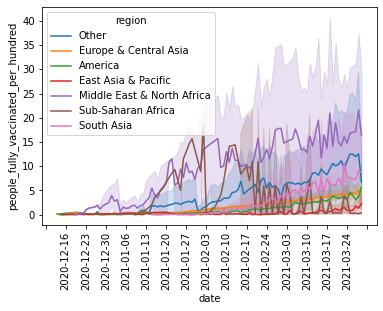

In [17]:
#Region plot
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='region')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

> #### 2.2 GDP

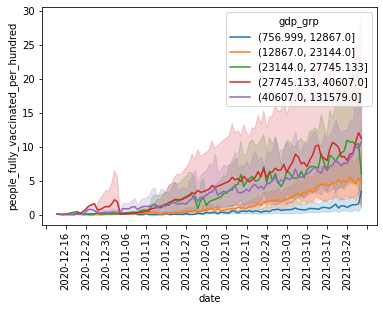

In [18]:
#GDP plot
df_gm['gdp_grp'] = pd.qcut(df_gm['gdp'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='gdp_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.3 Life Expectancy

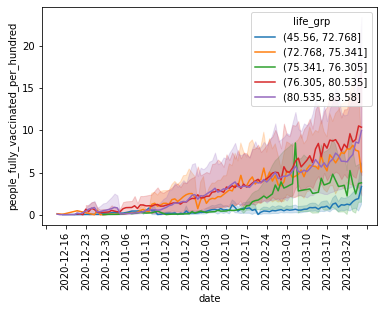

In [19]:
#Life expectancy plot
df_gm['life_grp'] = pd.qcut(df_gm['life'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='life_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.4 Population

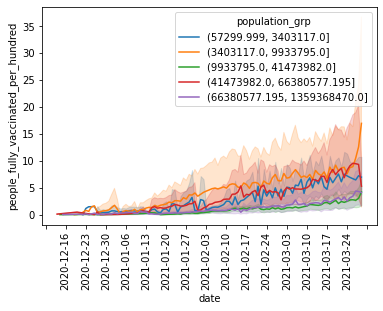

In [20]:
#Population plot
df_gm['population_grp'] = pd.qcut(df_gm['population'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='population_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.5 Top 10 GDP countries in the world vaccination rates

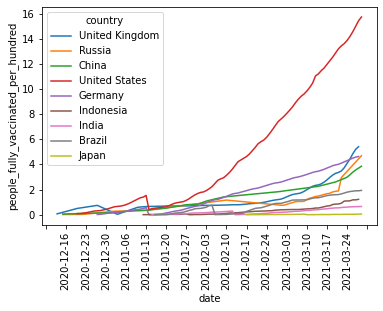

In [21]:
#Top 10 GDP countries in the world vaccination rates
graph = sns.lineplot(data=df_gm[df_gm['iso_code'].isin(['GBR','IDN','BRA','RUS','DEU','JPN','IND','USA','CHN'])]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.6 Overall

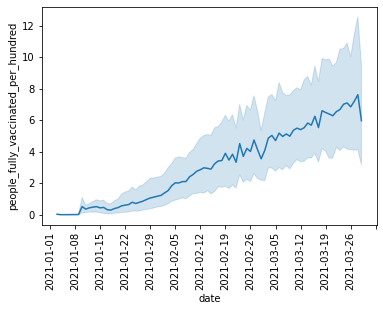

In [22]:
#Overall plot
import matplotlib.dates as mdates
graph = sns.lineplot(data=df.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

### 3. World Map Plots

In [23]:
df_gm['vaccines'].unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'EpiVacCorona, Sputnik V', 'Johnson&Johnson',
       'Pfizer/BioNTech, Sputnik V',
   

In [24]:
#Origin of Vaccine, noting some are collaborations between nations/ continents, notably Pfizer/BioNTech is counted against both European/ American.
df_gm['American_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Johnson&Johnson|Moderna|Pfizer'),1,0)
df_gm['Russian_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Sputnik V|EpiVacCorona'),1,0)
df_gm['Chinese_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Sinopharm/Beijing|Sinopharm/Wuhan|Sinovac'),1,0)
df_gm['Indian_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Covaxin'),1,0)
df_gm['European_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Oxford|AstraZeneca|BioNTech'),1,0)

In [25]:
#import geo data
import geopandas as gpd
## map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [26]:
#join new map data to existing CV19 vaccine dataframe
mapped = world.set_index('iso_a3').join(df_gm.set_index('iso_code')).reset_index()

In [27]:
#mapped[mapped['iso_a3']=='USA']

In [28]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')


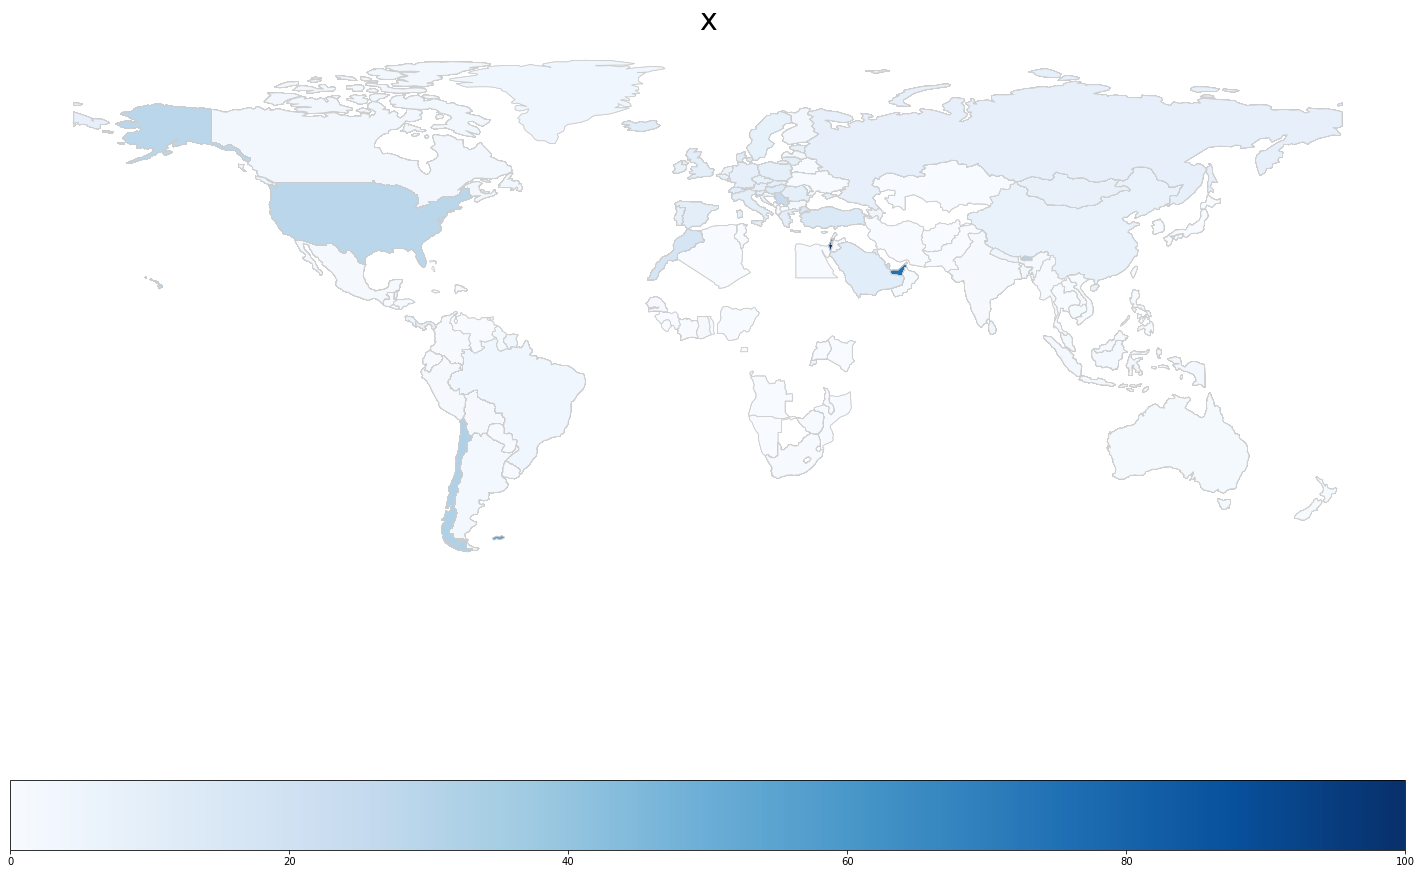

In [29]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

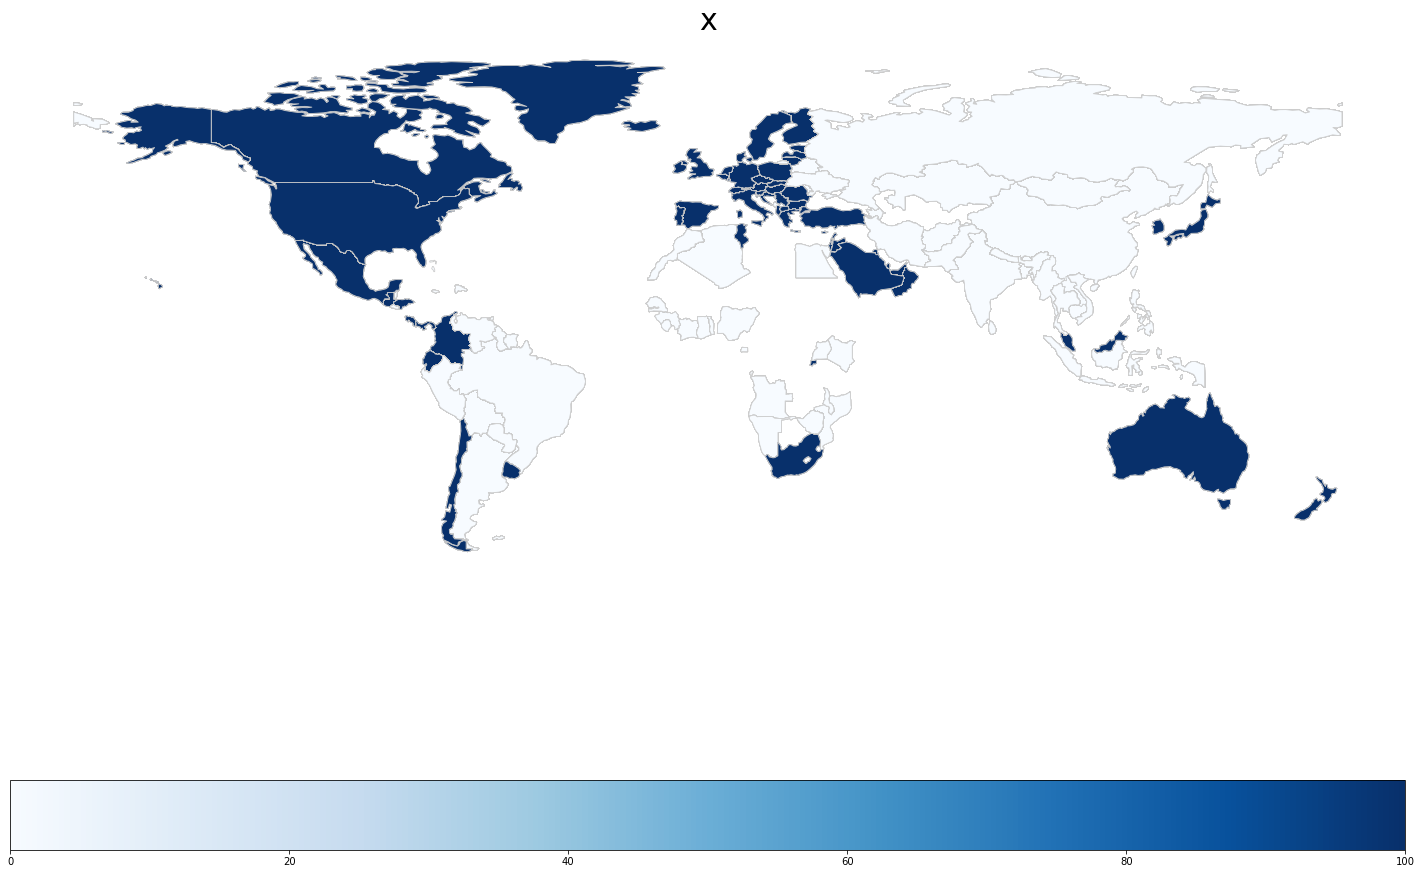

In [30]:
#Where are the American produced vaccines being used?
graph_world('American_Vaccine')

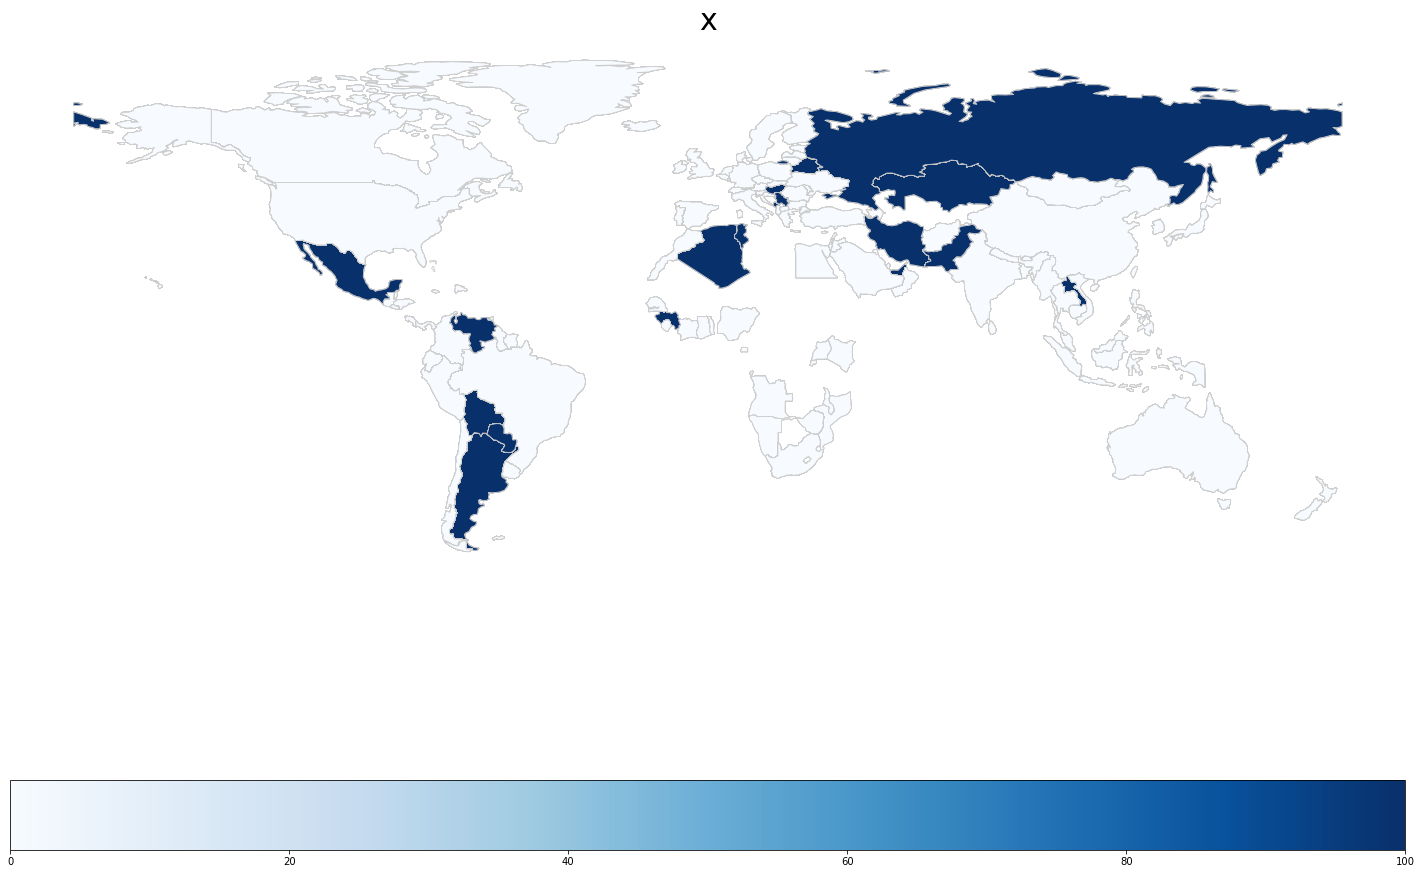

In [31]:
#Where are the Russian produced vaccines being used?
graph_world('Russian_Vaccine')

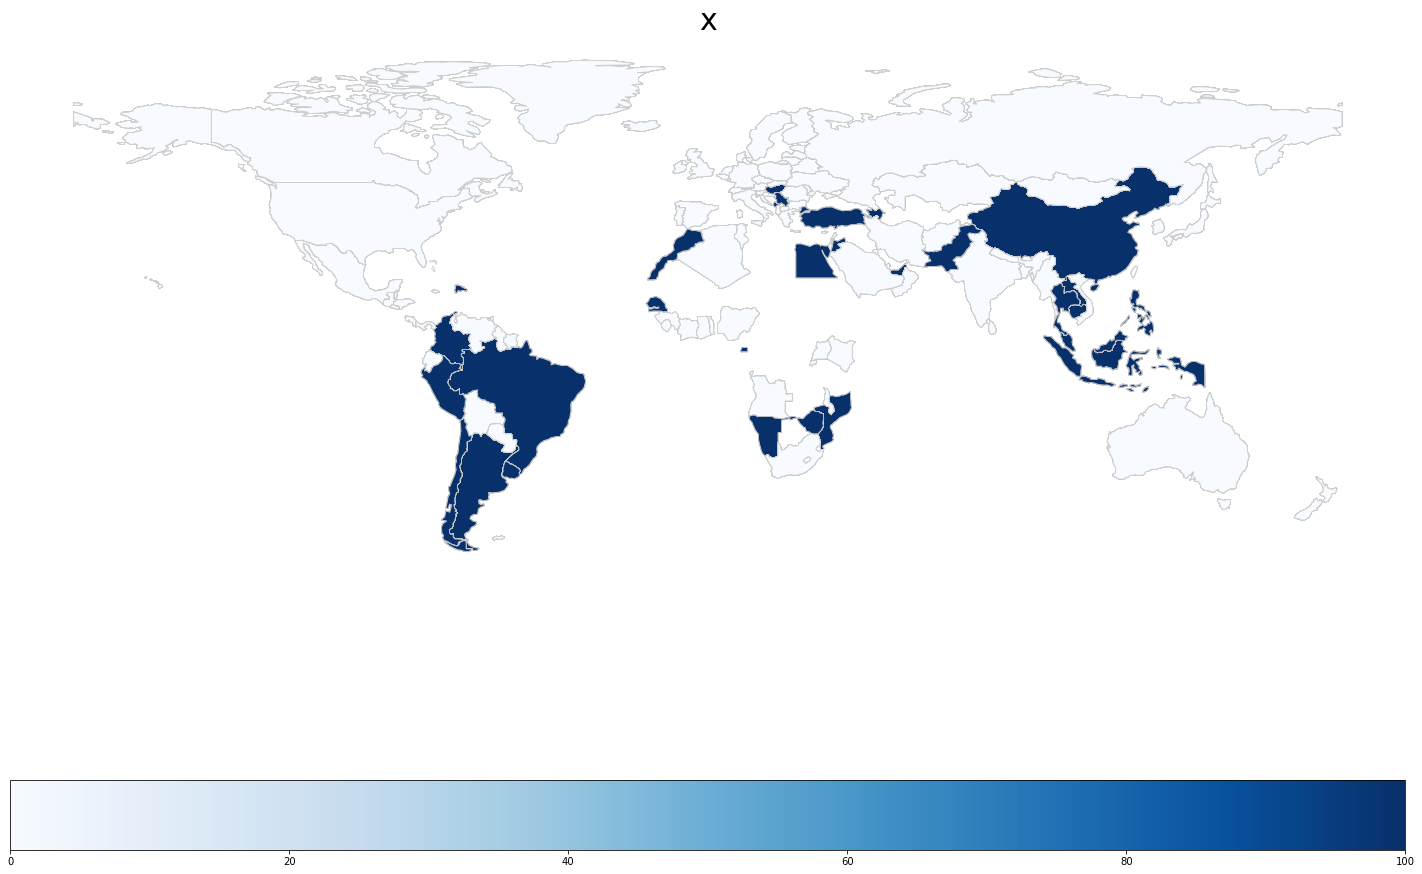

In [32]:
#Where are the Chinese produced vaccines being used?
graph_world('Chinese_Vaccine')

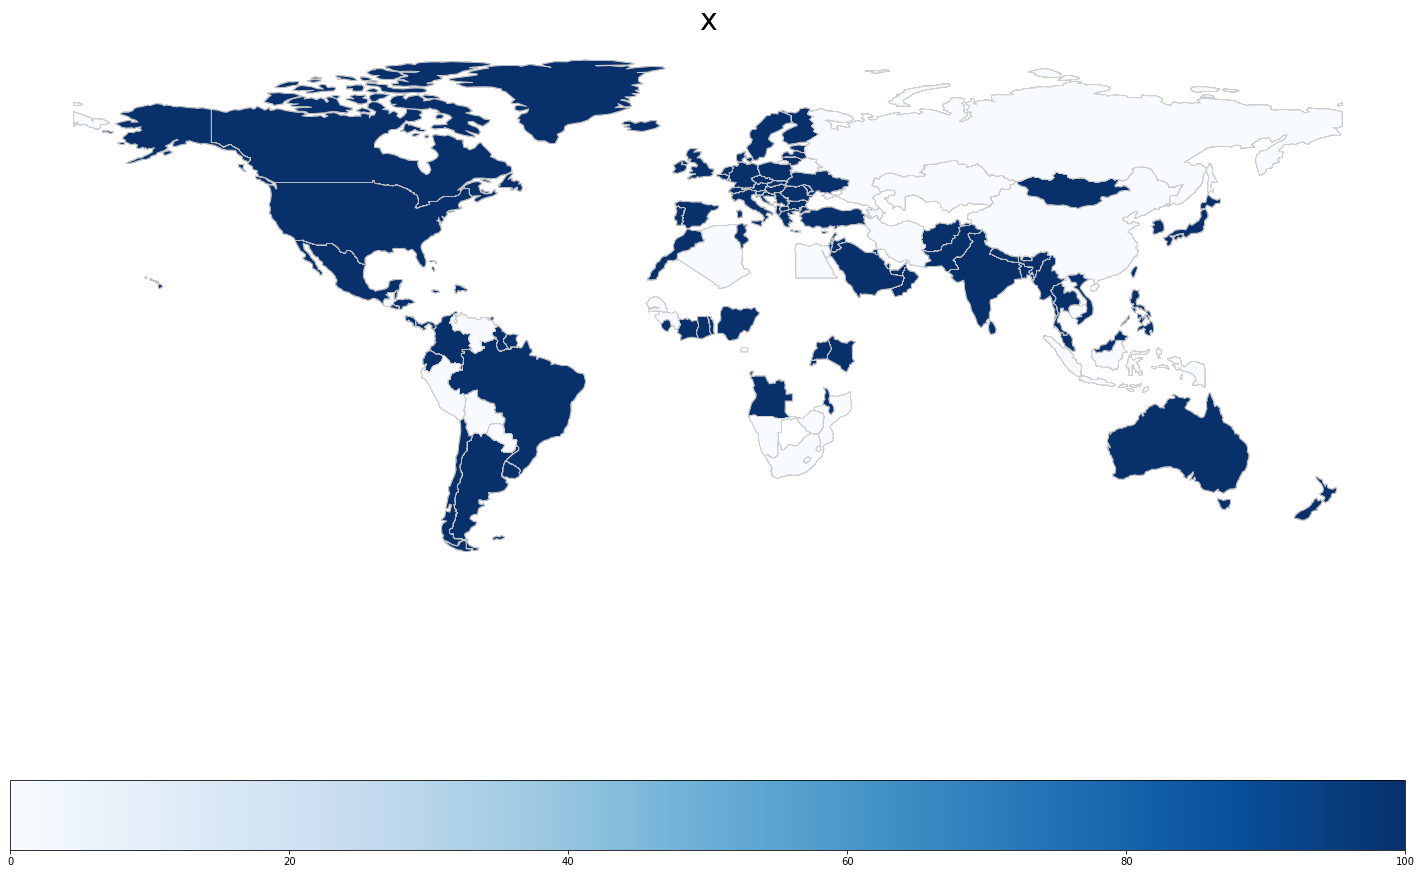

In [33]:
#Where are the Eurpean produced vaccines being used?
graph_world('European_Vaccine')

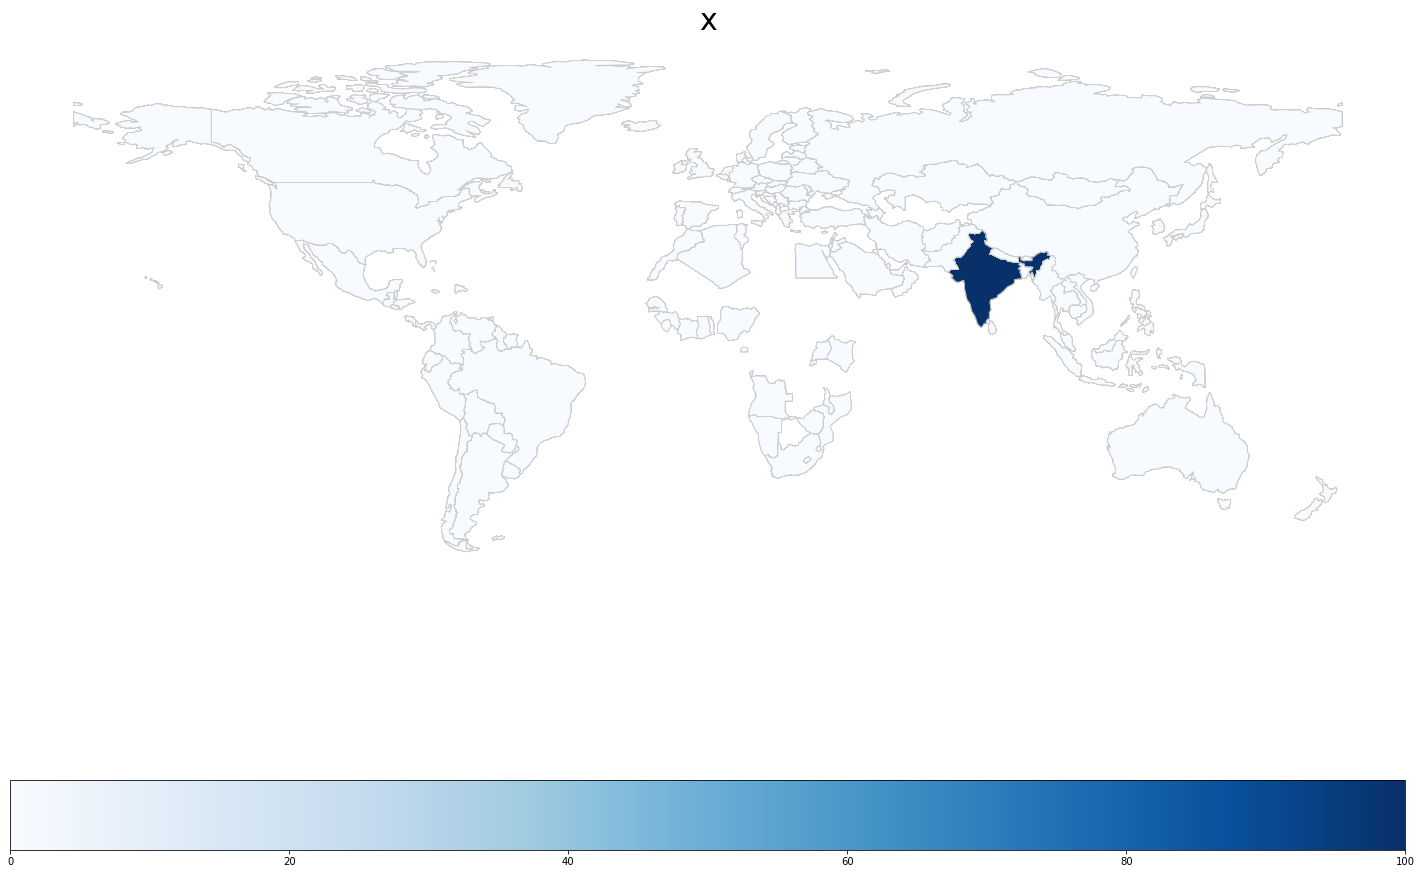

In [34]:
#Where are the Indian produced vaccines being used?
graph_world('Indian_Vaccine')

### 4. Forecast 

Looking to predict when people_vaccinated_per_hundred would potentially reach 100% coverage for certain countries. Let's go with the top 10 countries vaccinated to date to give us a decent history to forecast from. Let's plot the top 10 to remind ourselves:

In [35]:
top_10_vacc = list(df_gm[(~df_gm['people_fully_vaccinated_per_hundred'].isna())&(df_gm['date']=='2021-03-28')].sort_values(by='people_fully_vaccinated_per_hundred',ascending=False).head(10)['iso_code'])

In [36]:
top_10_vacc

['GIB', 'ISR', 'ARE', 'MDV', 'CHL', 'USA', 'BHR', 'SRB', 'OWID_WLS', 'QAT']

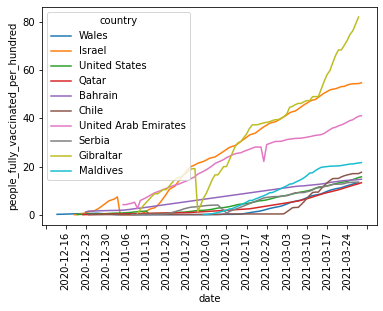

In [37]:
#Top 10 GDP countries in the world vaccination rates
graph = sns.lineplot(data=df_gm[df_gm['iso_code'].isin(top_10_vacc)]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

4.1 Forecast with Prophet

In [38]:
from fbprophet import Prophet
def fcast(cntry):
    p = df_gm[df_gm['iso_code'].isin([cntry])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred"]]
    p.columns = ['ds', 'y']
    # define the model
    model = Prophet()
    # # fit the model
    model.fit(p)
    # define the period for which we want a prediction
    future = list()
    for i in range(1, 13):
        date = '2021-%02d' % i
        future.append([date])
    for i in range(1, 13):
        date = '2022-%02d' % i
        future.append([date])    
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))
    # plot forecast
    model.plot(forecast)
    plt.ylim(0, 100)
    n_lower=forecast['yhat_lower'].sub(100).abs().idxmin()
    n_upper=forecast['yhat_upper'].sub(100).abs().idxmin()
    plt.title(cntry 
              + ' forecast of people_fully_vaccinated_per_hundred: 100% expected between ' 
              + forecast[n_upper:n_upper+1]['ds'].iloc[0].strftime('%Y-%m-%d') 
              + ' and ' 
              + forecast[n_lower:n_lower+1]['ds'].iloc[0].strftime('%Y-%m-%d'))
    plt.show()

          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01   -0.513736   -5.685667    4.441237
1 2021-02-01   14.750851    9.640385   20.113673
2 2021-03-01   40.322841   34.939333   45.145342
3 2021-04-01   82.084533   77.077989   87.147080
4 2021-05-01  126.679573  120.571573  133.479631
5 2021-06-01  169.730645  158.099740  182.022315
6 2021-07-01  214.315914  194.576092  235.294704
7 2021-08-01  258.281362  229.060665  287.848172
8 2021-09-01  303.612926  264.352080  344.369096
9 2021-10-01  348.691079  298.671793  403.327671


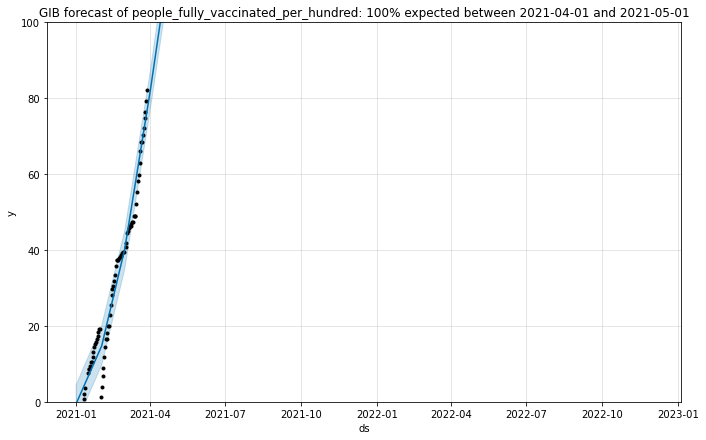

In [39]:
fcast('GIB')


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    2.160442    0.156324    4.166811
1 2021-02-01   19.821966   17.770213   21.776209
2 2021-03-01   39.819661   37.793426   41.758385
3 2021-04-01   59.350665   57.197415   61.420505
4 2021-05-01   76.811332   72.341070   81.357339
5 2021-06-01   95.445753   83.177725  106.479493
6 2021-07-01  113.871538   91.348295  134.679818
7 2021-08-01  132.062766   96.309147  164.301890
8 2021-09-01  150.775271   99.867061  197.317489
9 2021-10-01  168.824019  103.160674  225.454192


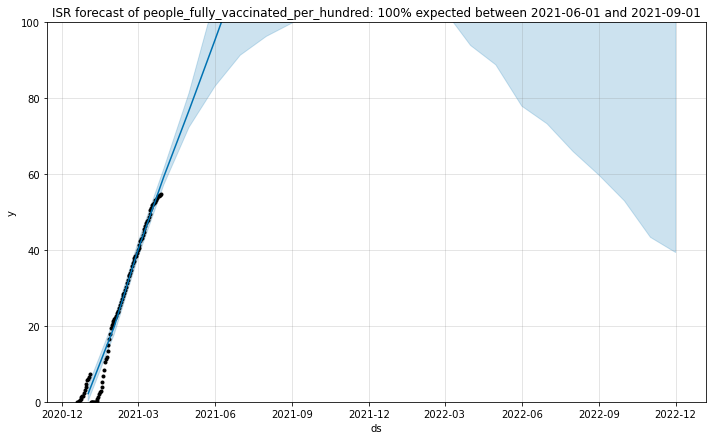

In [40]:
fcast('ISR')

          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    0.641662   -0.664506    1.794865
1 2021-02-01   17.717909   16.499147   18.896304
2 2021-03-01   29.910559   28.742356   31.130210
3 2021-04-01   41.540432   40.312055   42.680651
4 2021-05-01   53.647421   51.546824   55.625381
5 2021-06-01   65.382351   60.864813   69.922039
6 2021-07-01   78.040917   69.943682   85.978082
7 2021-08-01   90.207607   78.347624  102.108278
8 2021-09-01  102.867526   86.487477  120.149894
9 2021-10-01  114.982293   92.850064  137.286719


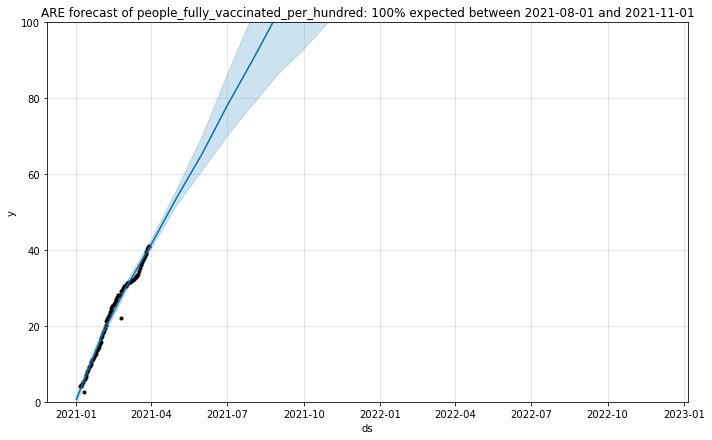

In [41]:
fcast('ARE')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -5.264531   -5.361545   -5.169710
1 2021-02-01  -0.258532   -0.353566   -0.163043
2 2021-03-01  10.839213   10.744595   10.934961
3 2021-04-01  22.167354   22.013457   22.338495
4 2021-05-01  26.112560   20.349199   32.069097
5 2021-06-01  30.499253   13.453421   47.646465
6 2021-07-01  34.878179    3.698290   66.344018
7 2021-08-01  38.968580   -8.475305   86.580412
8 2021-09-01  43.384392  -23.246396  109.632254
9 2021-10-01  47.422366  -36.761370  136.390329


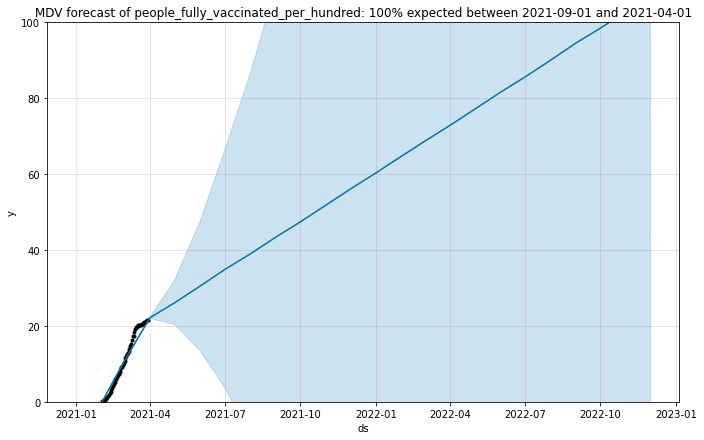

In [42]:
fcast('MDV')

          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    0.113660   -0.711949    0.908957
1 2021-02-01   -0.033286   -0.872026    0.714965
2 2021-03-01    0.722801   -0.014935    1.515354
3 2021-04-01   21.771402   21.000872   22.587669
4 2021-05-01   41.856992   39.059336   44.568996
5 2021-06-01   62.784067   55.967580   69.962136
6 2021-07-01   83.147307   70.931321   96.454925
7 2021-08-01  103.716453   84.807591  123.791990
8 2021-09-01  124.913341   97.745472  151.997639
9 2021-10-01  145.222491  110.487191  180.264124


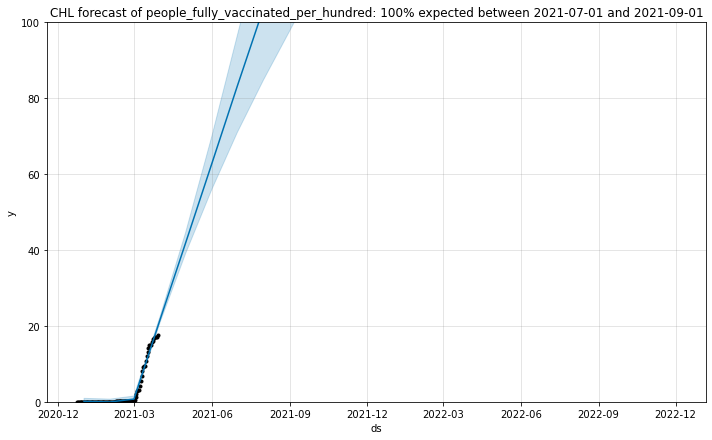

In [43]:
fcast('CHL')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   0.522207    0.365311    0.686411
1 2021-02-01   1.792308    1.636349    1.950673
2 2021-03-01   7.617359    7.462836    7.779883
3 2021-04-01  16.245087   16.077449   16.410908
4 2021-05-01  25.127319   23.685998   26.626543
5 2021-06-01  34.045776   30.027664   38.179390
6 2021-07-01  42.686712   35.445247   50.187986
7 2021-08-01  51.902999   40.633583   63.622295
8 2021-09-01  60.780028   45.178954   77.587402
9 2021-10-01  69.471486   49.435107   90.322521


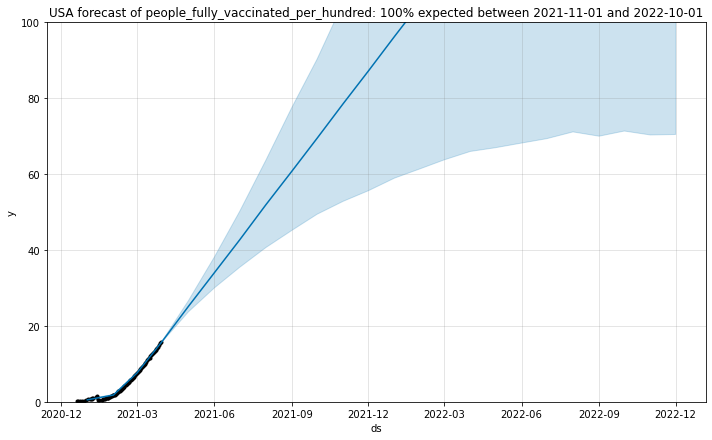

In [44]:
fcast('USA')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   1.761409    1.658047    1.871473
1 2021-02-01   6.171283    6.064190    6.275452
2 2021-03-01  10.728381   10.625265   10.824442
3 2021-04-01  15.248410   15.134741   15.353312
4 2021-05-01  19.242025   18.648939   19.776424
5 2021-06-01  23.363452   21.795285   24.817188
6 2021-07-01  27.423998   24.815999   30.146183
7 2021-08-01  31.546352   27.537820   35.802588
8 2021-09-01  35.653251   30.192133   41.508864
9 2021-10-01  39.716468   32.479960   47.404096


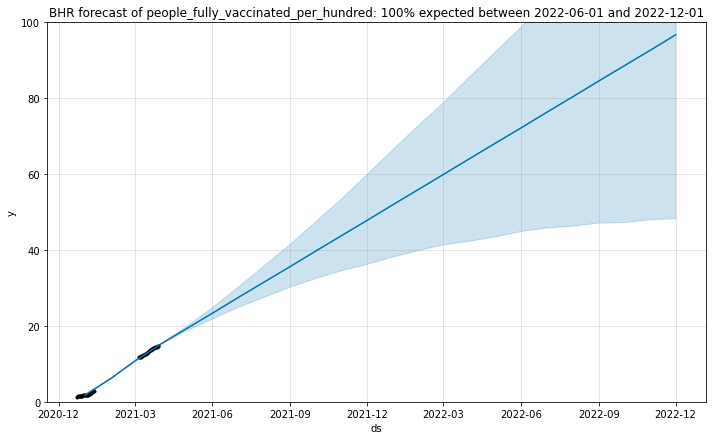

In [45]:
fcast('BHR')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -1.576609   -2.467048   -0.602733
1 2021-02-01   2.764653    1.759626    3.658153
2 2021-03-01   8.017676    7.110909    8.909040
3 2021-04-01  14.879085   13.937811   15.897718
4 2021-05-01  21.575922   20.532503   22.576517
5 2021-06-01  28.331372   26.808209   29.668193
6 2021-07-01  34.860529   32.675710   36.671676
7 2021-08-01  41.457774   38.377118   44.187545
8 2021-09-01  48.082994   44.047678   51.746767
9 2021-10-01  54.957963   49.803578   59.784226


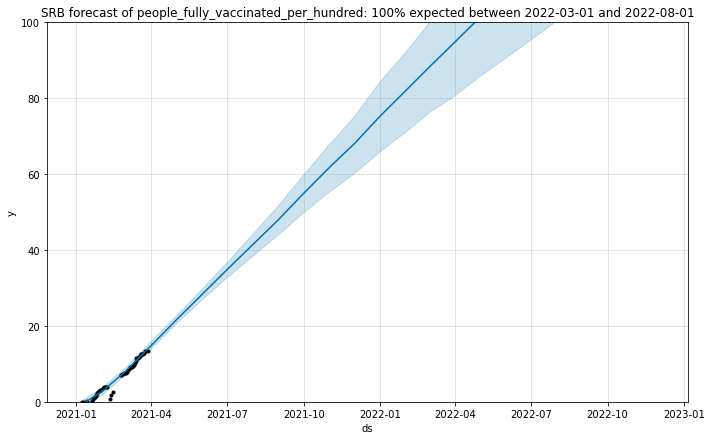

In [46]:
fcast('SRB')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   0.245413    0.144640    0.344593
1 2021-02-01  -0.036849   -0.135082    0.067722
2 2021-03-01   3.643436    3.541603    3.739241
3 2021-04-01  14.889034   14.779942   14.997993
4 2021-05-01  25.480774   24.002574   26.971696
5 2021-06-01  36.373951   32.462547   40.206223
6 2021-07-01  47.065442   40.331521   53.937012
7 2021-08-01  57.939036   47.765436   67.986272
8 2021-09-01  68.948736   54.955147   82.589704
9 2021-10-01  79.613830   61.702277   97.273458


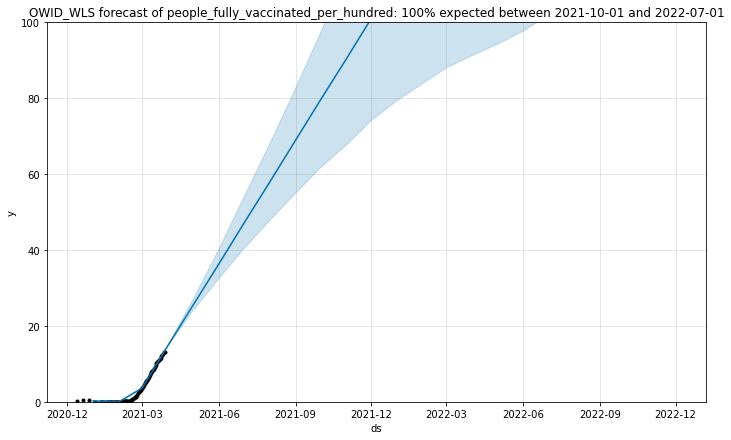

In [47]:
fcast('OWID_WLS')

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -0.073257   -1.938488    1.593436
1 2021-02-01   4.324310    2.572540    6.236810
2 2021-03-01   8.409237    6.686646   10.233844
3 2021-04-01  10.477506    8.780559   12.218228
4 2021-05-01  17.622993   15.916121   19.276262
5 2021-06-01  21.617184   19.882674   23.331390
6 2021-07-01  23.753521   22.047804   25.454766
7 2021-08-01  29.359667   27.651415   31.102871
8 2021-09-01  33.519609   31.642436   35.358463
9 2021-10-01  39.754786   37.905881   41.607255


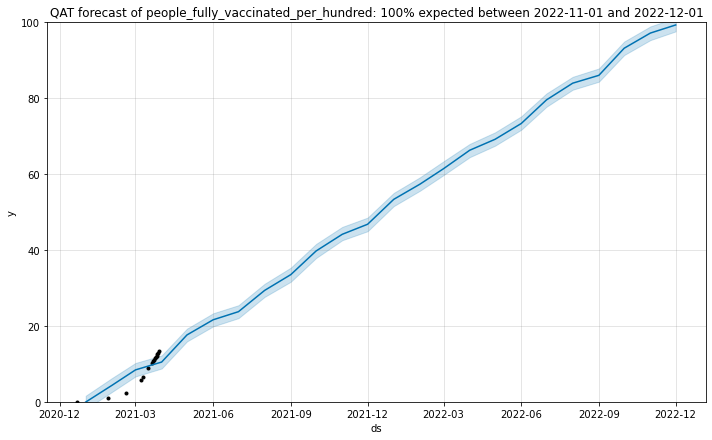

In [48]:
fcast('QAT')

Not perfect, but please upvote if you found this useful so that others may view to share thoughts, learnings and help me with feedback. Thanks 